In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [85]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [6]:
train['LoanAmount'].fillna(train.LoanAmount.mean(),inplace=True)
train['Loan_Amount_Term'].fillna(train.Loan_Amount_Term.mean(),inplace=True)
train['Credit_History'].fillna(train.Credit_History.mean(),inplace=True)

In [7]:
for col in train.columns:
    train[col].fillna(train[col].mode()[0],inplace = True) 

In [8]:
train.drop(columns=['Loan_ID'],inplace=True)
test.drop(columns=['Loan_ID'],inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [10]:
test['LoanAmount'].fillna(test.LoanAmount.mean(),inplace=True)
test['Loan_Amount_Term'].fillna(test.Loan_Amount_Term.mean(),inplace=True)
test['Credit_History'].fillna(test.Credit_History.mean(),inplace=True)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


### X-Y Split

In [12]:
Y_train = train['Loan_Status'] == 'Y'

In [13]:
X_train = train.drop(columns=['Loan_Status'])

### Dummy Variables

In [14]:
X_train = pd.get_dummies(X_train,drop_first=True,)

In [15]:
X_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1


### Normalization

In [16]:
X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())

### ML model

In [17]:
X_train.shape

(614, 14)

In [18]:
Y_train.shape

(614,)

In [160]:
model = keras.Sequential()
model.add(keras.layers.Dense(14,input_shape=(14,)))
model.add(keras.layers.Dense(200,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(50,activation='relu'))
model.add(keras.layers.Dense(25,activation='relu'))
model.add(keras.layers.Dense(12,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [161]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 14)                210       
                                                                 
 dense_145 (Dense)           (None, 200)               3000      
                                                                 
 dense_146 (Dense)           (None, 100)               20100     
                                                                 
 dense_147 (Dense)           (None, 50)                5050      
                                                                 
 dense_148 (Dense)           (None, 25)                1275      
                                                                 
 dense_149 (Dense)           (None, 12)                312       
                                                                 
 dense_150 (Dense)           (None, 1)               

In [162]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [163]:
model_history = model.fit(X_train[200:],Y_train[200:],epochs=100,validation_data=(X_train[:200],Y_train[:200]))

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 0.6476 - accuracy: 0.6981 - val_loss: 0.6468 - val_accuracy: 0.6650
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6225 - accuracy: 0.6981 - val_loss: 0.6327 - val_accuracy: 0.6650
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.6981 - val_loss: 0.6226 - val_accuracy: 0.6650
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5909 - accuracy: 0.6981 - val_loss: 0.6152 - val_accuracy: 0.6650
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5793 - accuracy: 0.6981 - val_loss: 0.6091 - val_accuracy: 0.6650
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5699 - accuracy: 0.6981 - val_loss: 0.6034 - val_accuracy: 0.6650
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.5610 - accuracy: 0.6981 - val_loss: 0.5988 - val_accuracy: 0.6650
Epoch 8/100


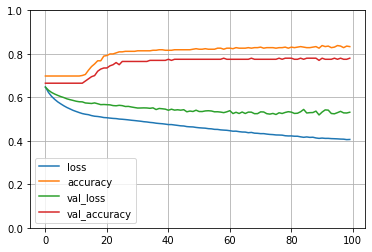

In [164]:
pd.DataFrame(model_history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [165]:
model.save(r"C:\Users\Amogh Prabhu\Desktop\Loan-Approval-System\model.h5")